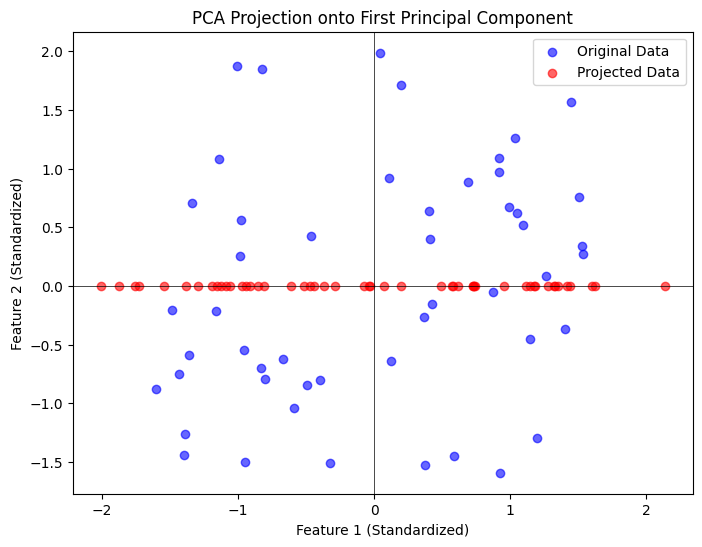

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Step 1: Generate synthetic dataset
X, y = make_classification(n_samples=200, n_features=5, n_informative=3, n_redundant=2, random_state=42)

# Step 2: Standardize the dataset
scaler = StandardScaler()
Z = scaler.fit_transform(X)  # Standardized data


In [ ]:
# Step 3: Calculate the covariance matrix
cov_matrix = np.cov(Z, rowvar=False)

# Step 4: Perform eigen decomposition on the covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

In [ ]:
# Step 5: Sort eigenvalues and select top k eigenvectors
k = 2  # Number of components to keep
sorted_index = np.argsort(eigenvalues)[::-1]  # Sort eigenvalues in descending order
sorted_eigenvalues = eigenvalues[sorted_index]
sorted_eigenvectors = eigenvectors[:, sorted_index]

# Select the top k eigenvectors (principal components)
Vk = sorted_eigenvectors[:, :k]

# Step 6: Project the data onto these components
Z_pca = np.dot(Z, Vk)

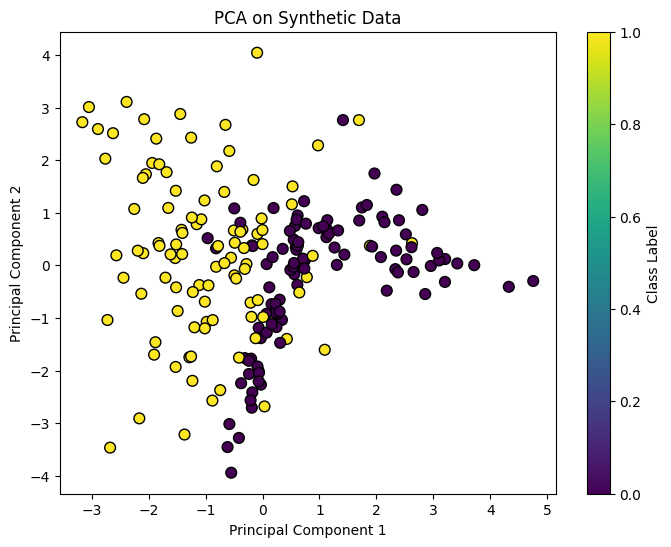

In [ ]:
# Step 7: Visualize the transformed data in the reduced dimensions
plt.figure(figsize=(8, 6))
plt.scatter(Z_pca[:, 0], Z_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=60)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Synthetic Data')
plt.colorbar(label='Class Label')
plt.show()
